In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split


In [2]:
# Load the dataset
df = pd.read_csv('E:\\Thesis\\Sample.csv', header=None)

# Assign column names
df.columns = ['user_id', 'prod_id', 'rating', 'timestamp']
df = df.drop('timestamp', axis=1)

# Get unique users and products
n_users = df['user_id'].nunique()
n_products = df['prod_id'].nunique()

# Map user and product IDs to sequential integers
user_id_map = {id_: i for i, id_ in enumerate(df['user_id'].unique())}
prod_id_map = {id_: i for i, id_ in enumerate(df['prod_id'].unique())}

df['user_id'] = df['user_id'].map(user_id_map)
df['prod_id'] = df['prod_id'].map(prod_id_map)

# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)


In [9]:
rows, columns = df.shape
print("No of rows = ", rows)
print("No of columns = ", columns)

No of rows =  148576
No of columns =  3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148576 entries, 0 to 148575
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  148576 non-null  int64
 1   prod_id  148576 non-null  int64
 2   rating   148576 non-null  int64
dtypes: int64(3)
memory usage: 3.4 MB


In [11]:
# Find number of missing values in each column
df.isna().sum()

user_id    0
prod_id    0
rating     0
dtype: int64

In [12]:
# Summary statistics of 'rating' variable
df['rating'].describe()

count    148576.000000
mean          3.946283
std           1.411990
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: rating, dtype: float64

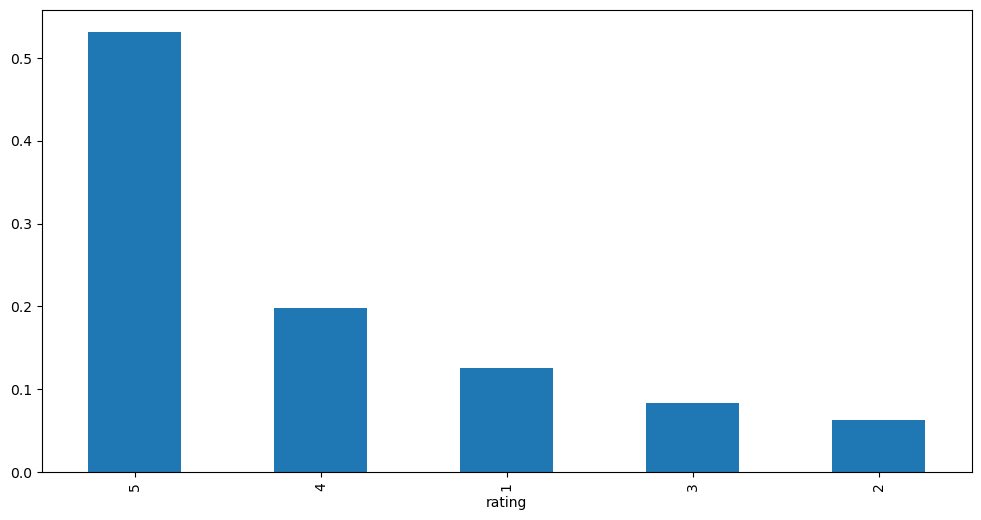

In [13]:
#Create the plot and provide observations

plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [14]:
# Number of unique user id and product id in the data
print('Number of unique USERS in Raw data = ', df['user_id'].nunique())
print('Number of unique ITEMS in Raw data = ', df['prod_id'].nunique())

Number of unique USERS in Raw data =  138315
Number of unique ITEMS in Raw data =  9138


C:\Users\ACER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


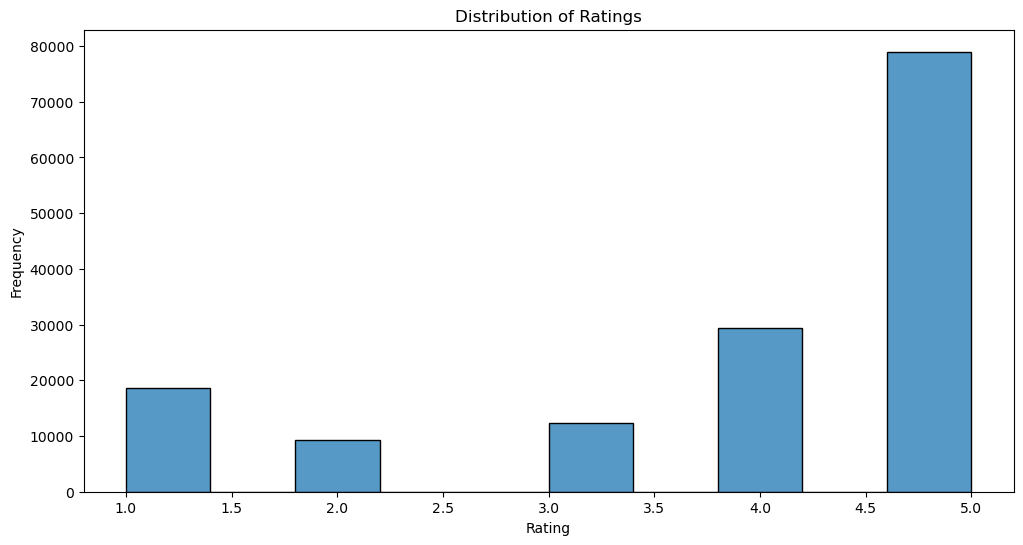

In [15]:
# Create the plot of rating distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['rating'], bins=10, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


Text(0.5, 0, 'Number of Ratings')

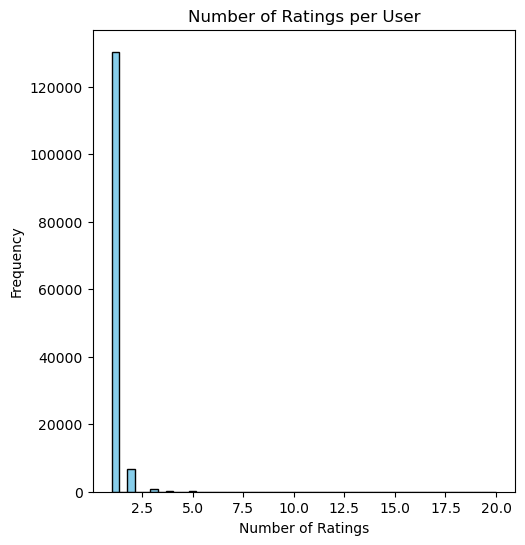

In [17]:
# Plot the count of unique users and products
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df['user_id'].value_counts().plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')

Text(0.5, 0, 'Number of Ratings')

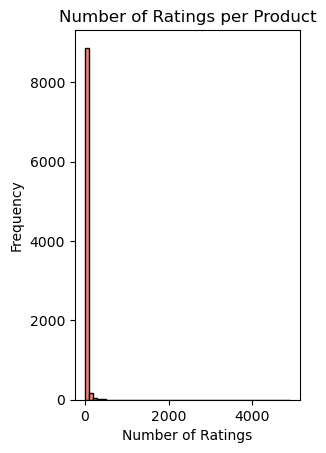

In [18]:
plt.subplot(1, 2, 2)
df['prod_id'].value_counts().plot(kind='hist', bins=50, color='salmon', edgecolor='black')
plt.title('Number of Ratings per Product')
plt.xlabel('Number of Ratings')

In [19]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [20]:
# Check for any duplicate rows
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Duplicate Rows:
0


In [22]:
# Unique counts of users and products
n_users = df['user_id'].nunique()
n_products = df['prod_id'].nunique()
print(f"\nNumber of unique users: {n_users}")
print(f"Number of unique products: {n_products}")



Number of unique users: 138315
Number of unique products: 9138


In [23]:
# Sample of the data
print("\nSample Data:")
print(df.head())



Sample Data:
   user_id  prod_id  rating
0        0        0       5
1        1        1       4
2        2        1       2
3        3        1       5
4        4        1       3


In [24]:
# Define user and product mappings
user_id_map = {id_: i for i, id_ in enumerate(df['user_id'].unique())}
prod_id_map = {id_: i for i, id_ in enumerate(df['prod_id'].unique())}

df['user_id'] = df['user_id'].map(user_id_map)
df['prod_id'] = df['prod_id'].map(prod_id_map)

# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Shape of the DataFrame
rows, columns = df.shape
print("\nNumber of rows and columns in the DataFrame:")
print(f"No. of rows = {rows}")
print(f"No. of columns = {columns}")


Number of rows and columns in the DataFrame:
No. of rows = 148576
No. of columns = 3


In [21]:
# Define the model
embedding_size = 50

# User embedding
user_input = Input(shape=[1], name='user')
user_embedding = Embedding(n_users, embedding_size, name='user_embedding')(user_input)
user_vec = Flatten(name='flatten_users')(user_embedding)

# Product embedding
prod_input = Input(shape=[1], name='product')
prod_embedding = Embedding(n_products, embedding_size, name='product_embedding')(prod_input)
prod_vec = Flatten(name='flatten_products')(prod_embedding)

# Dot product of user and product vectors
dot_product = Dot(axes=1, name='dot_product')([user_vec, prod_vec])

# Add a dense layer for better learning capacity
dense = Dense(128, activation='relu')(dot_product)
output = Dense(1)(dense)

# Build and compile the model
model = Model([user_input, prod_input], output)
model.compile(optimizer=Adam(), loss=MeanSquaredError())

# Print the model summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)             │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ product (InputLayer)          │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ user_embedding (Embedding)    │ (None, 1, 50)             │       6,915,750 │ user[0][0]                 │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ product_embedding (Embedding) │ (None, 1, 50)             │         456,900 │ product[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_users (Flatten)       │ (None, 50)                │               0 │ user_embedding[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_products (Flatten)    │ (None, 50)                │               0 │ product_embedding[0][0]    │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dot_product (Dot)             │ (None, 1)                 │               0 │ flatten_users[0][0],       │
│                               │                           │                 │ flatten_products[0][0]     │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 128)               │             256 │ dot_product[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 1)                 │             129 │ dense_2[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 7,373,035 (28.13 MB)

 Trainable params: 7,373,035 (28.13 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
# Ensure user_id and prod_id are integer types
train_data['user_id'] = train_data['user_id'].astype(np.int32)
train_data['prod_id'] = train_data['prod_id'].astype(np.int32)

# Ensure rating is float32
train_data['rating'] = train_data['rating'].astype(np.float32)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Train the model
history = model.fit(
    [train_data['user_id'], train_data['prod_id']],
    train_data['rating'],
    batch_size=64,
    epochs=10,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 70s 46ms/step - loss: 5.0951 - val_loss: 2.0149
Epoch 2/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - loss: 1.2924 - val_loss: 2.1455
Epoch 3/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - loss: 0.4949 - val_loss: 2.0358
Epoch 4/10
1486/1486 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - loss: 0.1850 - val_loss: 2.2321
Epoch 4: early stopping


In [5]:
# Evaluate the model on the test data
test_loss = model.evaluate([test_data['user_id'], test_data['prod_id']], test_data['rating'])
print(f'Test Loss: {test_loss}')


929/929 ━━━━━━━━━━━━━━━━━━━━ 1s 988us/step - loss: 2.2090
Test Loss: 2.2017123699188232


In [6]:
# Function to get product recommendations for a user
def deep_learning_recommendations(user_id, num_recommendations):
    user_vector = np.array([user_id] * n_products)
    prod_vector = np.array(list(range(n_products)))
    
    # Predict ratings for all products for the given user
    predictions = model.predict([user_vector, prod_vector])
    predictions = predictions.flatten()
    
    # Get the top N product recommendations
    top_recommendations = predictions.argsort()[-num_recommendations:][::-1]
    
    return top_recommendations

# Get recommendations for a specific user
user_id = 3  # Example user ID
recommended_products = deep_learning_recommendations(user_id, 5)
print(f"Top 5 product recommendations for user {user_id}: {recommended_products}")


286/286 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Top 5 product recommendations for user 3: [   1 5551 6768  219 4976]


In [8]:
# Save the model
model.save('E:\\Thesis\\recommender_model.h5')
